In [1]:
from gal4H0 import *
np.random.seed(0)
true_cosmology = FlatLambdaCDM(H0=70.,Om0=0.25)

## Incosistency 1: $z^4$

We study the bias on $H_0$ when GW events are distributed as $p_{\rm cat}(z)^2$ while in the analysis we just account for $p_{\rm cat}(z)$. 

In [2]:
galaxies_list = np.genfromtxt('MICECAT_LOS/micecat_905.csv',skip_header=1)
galaxies_list.min()

0.03024

In [3]:
LOSf=['MICECAT_LOS/micecat_451.csv','MICECAT_LOS/micecat_455.csv',
     'MICECAT_LOS/micecat_901.csv','MICECAT_LOS/micecat_905.csv']

sigmas=[0.1,0.2,0.3]
Ngw=1000000
zcut_rate=1.0
dl_thr=1550
H0_array=np.linspace(40,120,200)

posteriors={'H0_grid':H0_array}

for ilos in LOSf:
    print(ilos)
    galaxies_list = np.genfromtxt(ilos,skip_header=1)

    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,zcut_rate)
    
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=draw_gw_events(10000,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)        
        pextra=np.exp(zinterpo(gw_redshift))
        idxextra=np.random.choice(len(pextra),size=200,p=pextra/pextra.sum())
        gw_obs_dl,gw_true_dl,gw_redshift,std_dl=gw_obs_dl[idxextra],gw_true_dl[idxextra],gw_redshift[idxextra],std_dl[idxextra]
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors[ilos+'_'+str(sigma)+'_'+'combined']=combined


MICECAT_LOS/micecat_451.csv


100%|██████████████████████████████████████| 2125/2125 [00:15<00:00, 141.66it/s]


0.1
You detected 5691 binaries out of 100000 simulated


200it [00:00, 526.35it/s]
Running on GW events: 200it [02:40,  1.24it/s]


0.2
You detected 6432 binaries out of 100000 simulated


200it [00:00, 569.81it/s]
Running on GW events: 200it [02:29,  1.34it/s]


0.3
You detected 8648 binaries out of 100000 simulated


200it [00:00, 583.69it/s]
Running on GW events: 200it [02:31,  1.32it/s]


MICECAT_LOS/micecat_455.csv


100%|████████████████████████████████████| 48028/48028 [05:06<00:00, 156.94it/s]


0.1
You detected 5347 binaries out of 100000 simulated


200it [00:00, 603.96it/s]
Running on GW events: 200it [02:54,  1.15it/s]


0.2
You detected 6078 binaries out of 100000 simulated


200it [00:00, 472.01it/s]
Running on GW events: 200it [06:27,  1.94s/it]


0.3
You detected 8131 binaries out of 100000 simulated


200it [00:00, 286.26it/s]
Running on GW events: 200it [06:18,  1.89s/it]


MICECAT_LOS/micecat_901.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 944/944 [00:12<00:00, 77.73it/s]


0.1
You detected 5289 binaries out of 100000 simulated


200it [00:00, 252.45it/s]
Running on GW events: 200it [06:58,  2.09s/it]


0.2
You detected 5469 binaries out of 100000 simulated


200it [00:01, 195.26it/s]
Running on GW events: 200it [06:43,  2.02s/it]


0.3
You detected 7283 binaries out of 100000 simulated


200it [00:00, 243.29it/s]
Running on GW events: 200it [06:28,  1.94s/it]


MICECAT_LOS/micecat_905.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23661/23661 [04:47<00:00, 82.35it/s]


0.1
You detected 4258 binaries out of 100000 simulated


200it [00:01, 171.81it/s]
Running on GW events: 200it [05:38,  1.69s/it]


0.2
You detected 4961 binaries out of 100000 simulated


200it [00:00, 467.59it/s]
Running on GW events: 200it [05:21,  1.61s/it]


0.3
You detected 7024 binaries out of 100000 simulated


200it [00:00, 260.01it/s]
Running on GW events: 200it [05:12,  1.56s/it]


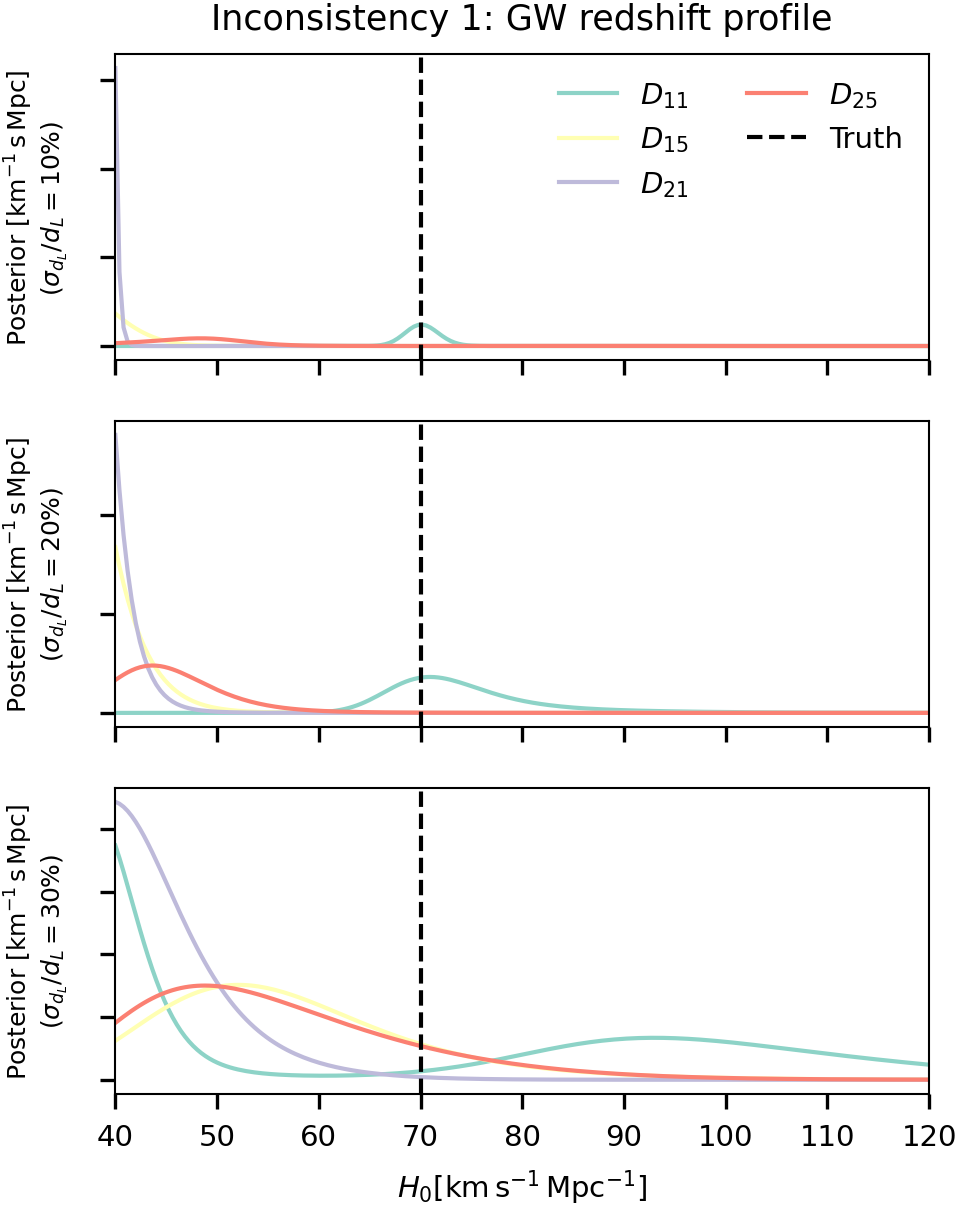

In [4]:
fig, ax= plt.subplots(3,1,figsize=(3.5,4.5),sharex=True)

pal=sns.color_palette('Set3')

colors=[pal[0],pal[1],pal[2],pal[3]]
lines=['solid','--',':']

labels_1=[r'$D_{11}$',
        r'$D_{15}$',
        r'$D_{21}$',
        r'$D_{25}$']

labels_2=[r'$\sigma_{d_L}/d_L=10\%$',
         r'$\sigma_{d_L}/d_L=20\%$',
         r'$\sigma_{d_L}/d_L=30\%$']


for i in range(len(colors)):
    for j in range(len(lines)):
        ilos=LOSf[i]
        sigma=sigmas[j]
        ax[j].plot(H0_array,posteriors[ilos+'_'+str(sigma)+'_'+'combined'],ls='solid',color=colors[i],label=labels_1[i])

for j in range(3):
    ax[j].axvline(70.,ls='--',color='k',label='Truth')
    ax[j].set_xlim([40,120])    
    ax[j].yaxis.set_ticklabels([])
    ax[j].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$'+'\n'+'('+labels_2[j]+')',fontsize=6)

ax[0].legend(frameon=False,ncol=2)
ax[0].set_title('Inconsistency 1: GW redshift profile')

ax[2].set_xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
#plt.tight_layout()
plt.savefig('figures_paper/big_fig_doublecount.pdf')



# Inconsistency 2: GW detection probability

Below we generate the Hubble constant posterior mismatching the GW detection probability in the analysis. Everything is done correcntly but then the GW detection probability is assumed to be an Heaviside step function




In [5]:
np.random.seed(0) # Reset the random seed

In [6]:
# We generate multiple H0 posterior for 200 events, different LOS and dl errors

LOSf=['MICECAT_LOS/micecat_451.csv','MICECAT_LOS/micecat_455.csv',
     'MICECAT_LOS/micecat_901.csv','MICECAT_LOS/micecat_905.csv']

sigmas=[0.1,0.2,0.3]
Ngw=200
zcut_rate=1.0
dl_thr=1550
H0_array=np.linspace(40,120,100)

posteriors={'H0_grid':H0_array}

for ilos in LOSf:
    print(ilos)
    galaxies_list = np.genfromtxt(ilos,skip_header=1)

    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,zcut_rate)
    
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift_TH21(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors[ilos+'_'+str(sigma)+'_'+'combined']=combined


MICECAT_LOS/micecat_451.csv


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2125/2125 [00:14<00:00, 144.24it/s]


0.1
You detected 200 binaries out of 100000 simulated


100it [00:00, 782.04it/s]
Running on GW events: 200it [02:49,  1.18it/s]


0.2
You detected 200 binaries out of 100000 simulated


100it [00:00, 807.69it/s]
Running on GW events: 200it [03:07,  1.07it/s]


0.3
You detected 200 binaries out of 100000 simulated


100it [00:00, 329.28it/s]
Running on GW events: 200it [02:55,  1.14it/s]


MICECAT_LOS/micecat_455.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48028/48028 [11:12<00:00, 71.39it/s]


0.1
You detected 200 binaries out of 100000 simulated


100it [00:00, 461.12it/s]
Running on GW events: 200it [02:34,  1.29it/s]


0.2
You detected 200 binaries out of 100000 simulated


100it [00:00, 478.16it/s]
Running on GW events: 200it [02:44,  1.22it/s]


0.3
You detected 200 binaries out of 100000 simulated


100it [00:00, 466.56it/s]
Running on GW events: 200it [03:00,  1.11it/s]


MICECAT_LOS/micecat_901.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 944/944 [00:20<00:00, 46.83it/s]


0.1
You detected 200 binaries out of 100000 simulated


100it [00:00, 334.57it/s]
Running on GW events: 200it [02:31,  1.32it/s]


0.2
You detected 200 binaries out of 100000 simulated


100it [00:00, 482.19it/s]
Running on GW events: 200it [02:35,  1.28it/s]


0.3
You detected 200 binaries out of 100000 simulated


100it [00:00, 491.12it/s]
Running on GW events: 200it [02:25,  1.37it/s]


MICECAT_LOS/micecat_905.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23661/23661 [06:00<00:00, 65.65it/s]


0.1
You detected 200 binaries out of 100000 simulated


100it [00:00, 328.14it/s]
Running on GW events: 200it [02:46,  1.20it/s]


0.2
You detected 200 binaries out of 100000 simulated


100it [00:00, 521.79it/s]
Running on GW events: 200it [02:33,  1.30it/s]


0.3
You detected 200 binaries out of 100000 simulated


100it [00:00, 322.85it/s]
Running on GW events: 200it [02:52,  1.16it/s]


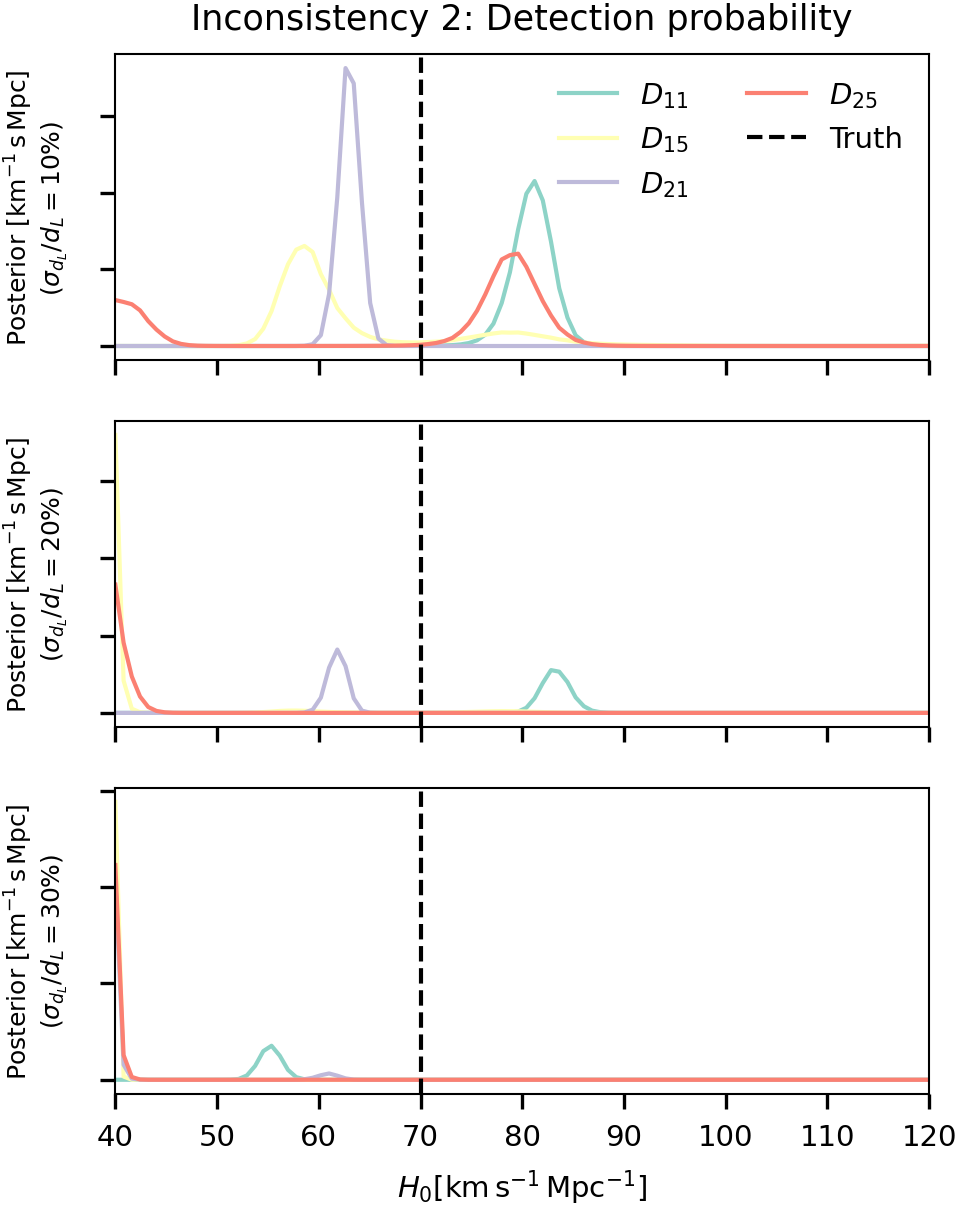

In [7]:
fig, ax= plt.subplots(3,1,figsize=(3.5,4.5),sharex=True)

pal=sns.color_palette('Set3')

colors=[pal[0],pal[1],pal[2],pal[3]]
lines=['solid','--',':']

labels_1=[r'$D_{11}$',
        r'$D_{15}$',
        r'$D_{21}$',
        r'$D_{25}$']

labels_2=[r'$\sigma_{d_L}/d_L=10\%$',
         r'$\sigma_{d_L}/d_L=20\%$',
         r'$\sigma_{d_L}/d_L=30\%$']


for i in range(len(colors)):
    for j in range(len(lines)):
        ilos=LOSf[i]
        sigma=sigmas[j]
        ax[j].plot(H0_array,posteriors[ilos+'_'+str(sigma)+'_'+'combined'],ls='solid',color=colors[i],label=labels_1[i])

for j in range(3):
    ax[j].axvline(70.,ls='--',color='k',label='Truth')
    ax[j].set_xlim([40,120])    
    ax[j].yaxis.set_ticklabels([])
    ax[j].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$'+'\n'+'('+labels_2[j]+')',fontsize=6)

ax[0].legend(frameon=False,ncol=2)
ax[0].set_title('Inconsistency 2: Detection probability')

ax[2].set_xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
#plt.tight_layout()
plt.savefig('figures_paper/big_fig_heaviside.pdf')

